# MULTI CLASS CLASSIFICATION OF GREYSCALE IMAGES - CNN

We will use mnist dataset form tensorflow's inbuilt dataset. This is a set of grey scale images. Dataset consists of 70,000 images of 28*28 pixels each. There are 10 output labels (from 0 to 9). We will build a model using CNN that will correctly classify the image. Since this is multi-class classification problem, we will use categorical cross entropy as loss function. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load mnist dataset
from tensorflow.keras.datasets import mnist

In [47]:
#data is already organised. Now just give separate names to them 
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [48]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

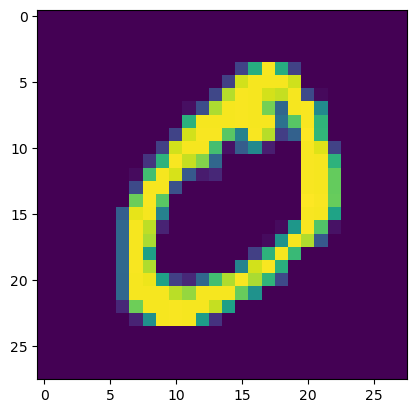

In [5]:
#sample input
plt.imshow(x_train[1])

In [6]:
#sample output
y_train[1]

0

In [7]:
#there are classes from 0-9 (totally 10 classes). So i will have 10 neurons in output layer and i label each output class
from tensorflow.keras.utils import to_categorical

In [49]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train=to_categorical(y_train)

In [9]:
y_test=to_categorical(y_test)

In [10]:
y_train.shape, y_test.shape, x_test.shape, x_train.shape

((60000, 10), (10000, 10), (10000, 28, 28), (60000, 28, 28))

In [11]:
#normalisation of train, test inputs
x_train=x_train/255
x_test=x_test/255

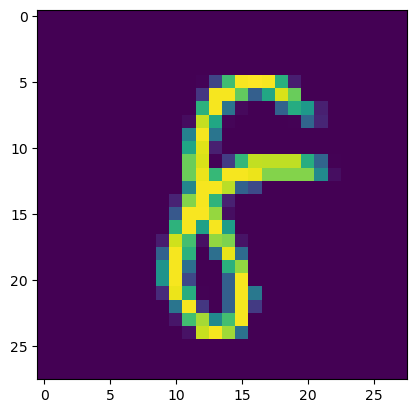

In [12]:
#display scaled image
plt.imshow(x_train[456])

In [13]:
#include clr channel in input (greyscale image has 1 clr channel only)
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
#build the model
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
#stop the training when min validation loss is reached
early_stop=EarlyStopping(monitor='val_loss',mode=min,patience=10) 

C:\Users\yrupa\AppData\Local\Temp\ipykernel_11072\4205257600.py:1: UserWarning: EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.
  early_stop=EarlyStopping(monitor='val_loss',mode=min,patience=10)


In [20]:
#train the model
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9128 - loss: 0.2910 - val_accuracy: 0.9829 - val_loss: 0.0531
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9841 - loss: 0.0501 - val_accuracy: 0.9869 - val_loss: 0.0396
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9910 - loss: 0.0283 - val_accuracy: 0.9865 - val_loss: 0.0431
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9937 - loss: 0.0214 - val_accuracy: 0.9894 - val_loss: 0.0349
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9876 - val_loss: 0.0396
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9968 - loss: 0.0094 - val_accuracy: 0.9882 - val_loss: 0.0421
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.9865 - val_loss: 0.0486
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9983 - loss: 

In [21]:
#calculate metrics
losses=pd.DataFrame(model.history.history)
losses

,accuracy,loss,val_accuracy,val_loss
0,0.956283,0.144743,0.9829,0.053109
1,0.984783,0.048192,0.9869,0.039598
2,0.990850,0.030258,0.9865,0.043093
3,0.993217,0.021123,0.9894,0.034940
4,0.995000,0.014941,0.9876,0.039603
5,0.996250,0.010858,0.9882,0.042115
6,0.996900,0.009349,0.9865,0.048582
7,0.997933,0.006908,0.9888,0.037637
8,0.998233,0.005450,0.9882,0.043576
9,0.998433,0.004760,0.9892,0.051910


<Axes: >

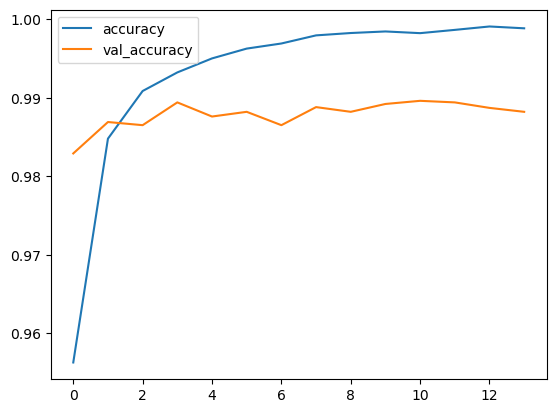

In [22]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

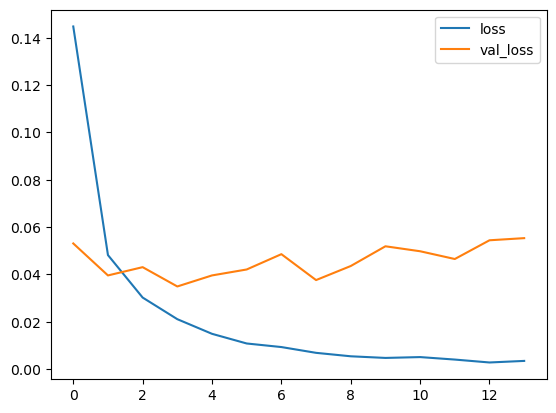

In [23]:
losses[['loss', 'val_loss']].plot()

In [24]:
model.evaluate(x_test, y_test, verbose=0)

[0.05534781515598297, 0.9882000088691711]

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
prediction=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [27]:
#testing with random input
prediction[23].argmax()

5

In [29]:
y_test[23]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [30]:
#use argmax function to find the index with highest value in array. This will correspond to the output class
y_test[23].argmax()

5

In [31]:
predictions=prediction.round()

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
#rounding-off to get output from each of the 10 output nodes if it is 0 or 1
preds=pd.DataFrame(prediction.round())

In [38]:
preds

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
preds.iloc[23]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: 23, dtype: float32

In [39]:
def x(pred):
    return pred.argmax()
x(preds.iloc[23])

5

In [40]:
#extracting the output classes in same format as y_test
pred=[]
for index in range(0,10000):
    a=x(preds.iloc[index])
    pred=np.append(pred,a)
pred

array([7., 2., 1., ..., 4., 5., 6.])

In [41]:
y_tests= pd.DataFrame(y_test)
y_tests
#y_test is in below fprmat beacuse we converted to categorical values. So we are bringing it back to original form in below cell

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
ytest=[]
for index in range(0,10000):
    a=x(y_tests.iloc[index])
    ytest=np.append(ytest,a)
ytest

array([7., 2., 1., ..., 4., 5., 6.])

In [43]:
print(confusion_matrix(ytest, pred))

[[ 976    0    0    1    0    0    1    0    2    0]
 [   0 1127    2    0    1    1    3    1    0    0]
 [   4    0 1013    5    0    0    2    4    4    0]
 [   0    0    1 1001    0    6    0    1    1    0]
 [   0    0    0    0  975    0    1    0    0    6]
 [   2    0    0    5    0  883    2    0    0    0]
 [   5    2    0    0    1    1  948    0    1    0]
 [   1    0    6    0    0    0    0 1015    1    5]
 [   7    0    1    3    0    0    0    1  959    3]
 [   3    2    0    5    8    1    0    3    2  985]]


In [45]:
#all the above steps were done to remove the to_categrical fn..so that confusion matrix will work .. else it will give multilabel error
#so in the beginning dont make changes to original datasets. While performing to_categorical, name it as a different dataset like y_cat_test

## SUMMARY
1. Average is 0.99 which is a very good.
2. Loss function is 0.003499 which is very less.
3. By implementing EarlyStopping callback function, we were able to stop the training at 14th epoch itself.
4. By manually picking up and testing a sample input (x_test[23]), we were able to see prediction[23] was same as y_test[23]
5. When y_test and pred (after converting them to same formats and as arrays) were fed into confusion matrix, the results were commendable.
6. Thus our model is a good model. 